## Predicting expenses per each variables on Insurance dataset using Machine Learning algorithms.
<b> In this article, I am using Insurance dataset as "insurance.xlsx".     
    
<b>  In this article, we are going to find out, Is there a relationship between expenses per each variables (age, sex, bmi, children, smoker, region) on Insurance dataset using Machine Learning algorithms. The algorithms included ElasticNet Regression.


## Step - 1 : Business Problem Understanding
- <b> What is the relationship between each variables (age, sex, bmi, children, smoker, region) and expenses ?
       
- <b> On the basis of our new data (age=31, sex="female", bmi=25.74, children=0, smoker="no", region="northeast") can expenses be predicted ?    
    
- <b> On the basis of this data, how should they expect expenses in the future ? These general questions might lead me to more specific questions :
    
   1. Is there a relationship between each variables (age, sex, bmi, children, smoker, region) and expenses ?
   2. How strong is that relationship ?
   3. Which variables contribute to expenses ?
   4. What is the effect of each variables on expenses ?
   5. Given new data, can expenses be predicted ?

<b> importing all the necessary libraries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<b> In the above, i have imported all the necessary libraries.

## Step - 2 : Data Understanding
### 2.1 Data Collection
<b>Load the dataset by using read_excel() to read the dataset and save it to the 'df' variable and take a look at the first 5 lines using the head() method.

In [2]:
# Load the dataset.
df = pd.read_excel("insurance.xlsx")

# Display the first 5 lines using the head() method.
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


### 2.2 Data Understanding
<b> Let’s have a look at data dimensionality.

In [3]:
df.shape

(1338, 7)

<b> From the output, we can see that the table contains 1338 rows and 7 columns.
    
    
<b> We can use the info() method to output some general information about the dataframe :

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


<b> int64, float64 and object are the data types of our features. We see that 3 features are object (categorical), 4 features are numeric (2 features are int64 + 2 features are float64). With this same method, we can easily see if there are any missing values. Here, there are none because each column contains 1338 observations, the same number of rows we saw before with shape.
    
    
<b> Here 7 variables or features (columns) are there, 3 features are object (categorical), 4 features are numeric (2 features are int64 + 2 features are float64). The details of these variables as follows :
    
- **age:** age of primary beneficiary.
- **sex:** insurance contractor gender (female or male).
- **bmi:** body mass index, providing an understanding of body, weights that are relatively high or low relative to height, - objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9
- **children:** number of children covered by insurance / number of dependents
- **smoker:** weither person smoking a cigarette or not.
- **region:** the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.
- **expenses:** individual medical costs billed by health insurance

## Step - 3 : Data Preprocessing
### 3.1 Exploratory Data Analysis (EDA)
- <b> On the basis of this data, how should they expect expenses in the future ? These general questions might lead me to more specific questions :
    
   1. Is there a relationship between each variables (age, sex, bmi, children, smoker, region) and expenses ?
   2. How strong is that relationship ?
   3. Which variables contribute to expenses ?
   4. What is the effect of each variables on expenses ?
   5. Given new data, can expenses be predicted ?
    
    

<b> The describe method shows basic statistical characteristics of each numerical feature (int64 and float64 types): count, mean, standard deviation, min, max, median, 0.25 and 0.75 quartiles.

In [5]:
df.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


<b> In order to see statistics on non-numerical features, one has to explicitly indicate data types of interest in the include parameter : count, unique, top (mode), freq.

In [6]:
df.describe(include="object")

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


<b> For categorical (type object) features we can use the value_counts method. Let's have a look at the distribution of sex:

In [7]:
df["sex"].value_counts()

male      676
female    662
Name: sex, dtype: int64

<b> 676 persons out of 1338 are male and 662 are female.
    
    
<b> Now use the value_counts method on smoker variable.

In [8]:
df["smoker"].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

<b> 1064 persons out of 1338 are non-smokers and 274 are smokers.
    
<b> Now use the value_counts method on region variable.

In [9]:
df["region"].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

<b> In the region variable, there are 4 unique categories i.e. southeast, southwest, northwest and northeast. Out-of 1338 persons 364 are staying in southeast, 325 are staying in southwest, 325 are staying in northwest and 324 are staying in northeast.

<b> Seperate the categorical and continous data from the dataset. 

In [10]:
# initialize the empty list for categorical data.
categorical = []

# initialize the empty list for continous data.
continous = []

# initialize the empty list as check.
check = []

# check the data types of each variables and store it as "d_types" object.
d_types = dict(df.dtypes)  # It returns the each variable names with data type.

# Apply for loop.
for name, type in d_types.items():
    
    # If dtype="object" add those variable names in categorical list.
    if str(type) == "object":
        categorical.append(name)
        
    # If dtype="float64" add those variable names in continous list.    
    elif str(type) == "float64":
        continous.append(name)
        
    # If dtype!="object" and "float64" add those variable names in check list.
    else:
        check.append(name)
        

# print the list of categorical features.
print("categorical features:", categorical)

# print the list of continous features.
print("continous features:", continous)

# print the list of features which needs to check.
print("features to be checked:", check)
    

categorical features: ['sex', 'smoker', 'region']
continous features: ['bmi', 'expenses']
features to be checked: ['age', 'children']


<b> From the above, we conclude that as follows :
    
   - categorical features are 'sex', 'smoker' and 'region'.
   - continous features are 'bmi', 'expenses', "age".
   - discreate count feature is "children".
    

<b> Checking the correlation between variables by using corr().

In [11]:
df.corr()

,age,bmi,children,expenses
age,1.000000,0.109341,0.042469,0.299008
bmi,0.109341,1.000000,0.012645,0.198576
children,0.042469,0.012645,1.000000,0.067998
expenses,0.299008,0.198576,0.067998,1.000000


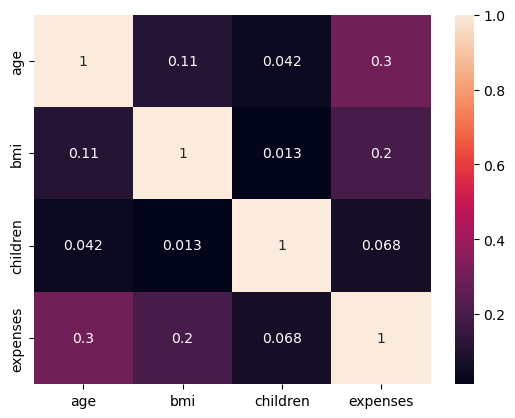

In [12]:
# calculate the correlation between variables and store it in "corr" object.
corr = df.corr()

# plotting correlation heatmap.
# Set annot=True.
sns.heatmap(corr, annot=True)

# displaying heatmap
plt.show()

- <b> The relationship between dependent (expenses) and independent (age, bmi, children) variables should be high. The higher relationship gives the stronger the correlation and accuracy.
    
- <b> The relationship between any two independent variables should be low, it will gives the low accuracy.


### 3.2 Data Cleaning
<b> Checking the Empty cells / Missing values :
- The isnull().sum() method returns the total number of missing values (count) present in the each column.

In [13]:
# Check the missing values records.
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

<b> In the above, we can see that there is no missing values.
    

<b> Here we are dropping the "region" variable, because there is no relationship between "region" and "expenses".

In [14]:
# drop the region variable.
df.drop("region", axis=1, inplace=True)

### 3.3 Data Wrangling
<b> Here we are going to encode the "sex" and "smoker" variables. As we can see in the above, the value_counts of "sex" and "smoker" is 2. So here we are using replace() function to encode the these variables, instead dummy_variables or OneHotEncoding or LabelEncoding, etc.

In [15]:
# encoding the "sex" variable.
df["sex"].replace({"female":0, "male":1}, inplace=True)

# encoding the "smoker" variable.
df["smoker"].replace({"no":0, "yes":1}, inplace=True)

In [16]:
# print the "sex" and "smoker" variables.
df[["sex", "smoker"]].head()

,sex,smoker
0,0,1
1,1,0
2,1,0
3,1,0
4,1,0


<b> We can see in the above, we have done with encoding

### 3.4 Train/Test Split
<b> Creating independent variables ("age", "sex", "bmi", "children", "smoker") as "x" variable and dependent variable "expenses" as "y" variable.

In [17]:
# Create x and y variables.
x = df[["age", "sex", "bmi", "children", "smoker"]]   # independent variables
y = df["expenses"]                                    # dependent variable

<b> In the above, I have created x variable with 5 independent (input) variables and y variable with 1 dependent (output) variable.

In [19]:
# import train_test_split from scikit-learn.
from sklearn.model_selection import train_test_split

# Apply the train_test_split() function.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=9)

In the first line of the above code, we have imported the train_test_split function from the sklearn library.


In the second line, we have used four variables, which are :

   - x_train: It is used to represent features for the training data
   - x_test: It is used to represent features for testing data
   - y_train: It is used to represent dependent variables for training data
   - y_test: It is used to represent independent variable for testing data
   
   
In the train_test_split() function, we have passed four parameters. In which first two are for arrays of data, and test_size is for specifying the size of the test set which tells the dividing ratio of training and testing sets. The last parameter, random_state, is used to set a seed for a random generator so that you always get the same result.

<b> View the dimensions of x_train, x_test, y_train, y_test

In [20]:
x_train.shape, x_test.shape

((1070, 5), (268, 5))

In [21]:
y_train.shape, y_test.shape

((1070,), (268,))

## Step - 4, 5 : Modelling and Evaluation :
<b> ElasticNet regression with default parameters. i.e. α (alpha)=1.0, λ (l1_ratio)=0.5

In [38]:
# Modelling
# import the Ridge from sklearn.linear_model library.
from sklearn.linear_model import ElasticNet

# save (initialize) the model as "ridge_base".
enr_base = ElasticNet()

# Train the model using training sets
enr_base.fit(x_train, y_train)


# Prediction
# Predict on the train data set.
train_predictions = enr_base.predict(x_train)

# Predict on the test data set.
test_predictions = enr_base.predict(x_test)


# Evaluation
print("Train_accuracy:", enr_base.score(x_train, y_train))
print("Test_accuracy:", enr_base.score(x_test, y_test))


# Cross Validation Score (CV)
# import the cross_val_score class from sklearn.model_selection library
from sklearn.model_selection import cross_val_score

# Apply the cross_val_score() function and print the result.
print("Cross Validation Score:", cross_val_score(enr_base, x, y, cv=5).mean())

Train_accuracy: 0.39155822533558715
Test_accuracy: 0.3970277641347352
Cross Validation Score: 0.3889250431216654


<b> ElasticNet regression with default parameters, the training set and testing set performances are comparable. From the above we conclude that, we have got quite good model on train and test data sets. We got an train accuracy of 39.15%, test accuracy of 39.70% and cross validate score of 38.89% with this model.

### Applying  Hyper Parameter Tuning for ElasticNet Regression
<b> Here we are using GridSearchCV() function. GridSearchCV() function is used to identify the best value (parameter) within given dat by appling cross validation (CV).
    
<b> Grid searching is a method to find the best possible combination of hyper-parameters at which the model achieves the highest accuracy.

In [41]:
# import the GridSearchCV from sklearn.model_selection library.
from sklearn.model_selection import GridSearchCV

# Model
estimator = ElasticNet()

# Parameters and values.
param_grid = {"alpha":[0.1,0.2,0.5,0.7,1,5,10,30,50,60,75,77,78,100],
               "l1_ratio":[0.1,0.5,0.75,0.9,0.95,1]}

# Identify the best value of the parameter within given values for the given data.
model_hp = GridSearchCV(estimator,param_grid,cv=5,scoring="neg_mean_squared_error")
model_hp.fit(x_train, y_train)
model_hp.best_params_

{'alpha': 50, 'l1_ratio': 1}

<b> From the above, we have got the best parameter, i.e. α (alpha)=50, λ (l1_ratio)=1 

### Here we are Rebuilding the ElasticNet Model with best Hyper Parameter Tuning, i.e. α (alpha)=50,  λ (l1_ratio)=1

In [42]:
# Modelling
# import the ElasticNet from sklearn.linear_model library.
from sklearn.linear_model import ElasticNet

# save (initialize) the model as "enr_best" 
# and pass alpha=50 and λ (l1_ratio)=1
enr_best = ElasticNet(alpha=50, l1_ratio=1)

# Train the model using training sets
enr_best.fit(x_train, y_train)

# print the intercept.
print("Intercept:", enr_best.intercept_)

# print the coefficients.
print("Coefficients:", enr_best.coef_)


# Prediction
# Predict on the train data set.
train_predictions = enr_best.predict(x_train)

# Predict on the test data set.
test_predictions = enr_best.predict(x_test)


# Evaluation
print("Train_accuracy:", enr_best.score(x_train, y_train))
print("Test_accuracy:", enr_best.score(x_test, y_test))


# Cross Validation Score (CV)
# import the cross_val_score class from sklearn.model_selection library
from sklearn.model_selection import cross_val_score

# Apply the cross_val_score() function and print the result.
print("Cross Validation Score:", cross_val_score(enr_best, x, y, cv=5).mean())

Intercept: -11336.591469036648
Coefficients: [  256.68842008    -0.           303.91129506   408.88291866
 23323.3694514 ]
Train_accuracy: 0.743200050042114
Test_accuracy: 0.7747832866417829
Cross Validation Score: 0.7468453212720682


<b> In the above, we have build the ElasticNet Model with best Hyper Parameter Tuning, i.e. α (alpha)=50, λ (l1_ratio)=1 
    
<b> The training set and testing set performances are comparable. From the above we conclude that, we have got good model on train and test data sets. We got an train accuracy of 74.32%, test accuracy of 77.47% and cross validate score of 74.68% with this model.

### Prediction on New Data :

In [43]:
# New Data
input_data = {"age":31, "sex":"female", "bmi":25.74, 
              "children":0, "smoker":"no", "region":"northeast"}

<b> Recall that we will need to convert any incoming data to ElasticNet regression data, since that is what our model is trained on. So here we are applying same preprocess on the input_data.

<b> Preprocessing on the new data.

In [44]:
# Preprocessing on the new data.

# create the "df_test" DataFrame with new data.
df_test = pd.DataFrame(input_data, index=[0])

# drop the region variable.
df_test.drop("region", axis=1, inplace=True)

# encoding the "sex" variable.
df_test["sex"].replace({"female":0, "male":1}, inplace=True)

# encoding the "smoker" variable.
df_test["smoker"].replace({"no":0, "yes":1}, inplace=True)

# store the df_test data in new object as "transformed_data".
transformed_data= df_test


<b> Prediction on transformed_data (new data)

In [45]:
# prediction on transformed_data (new data).
enr_best.predict(transformed_data)

array([4443.42628845])

<b> From the above prediction, On the basis of our new data (age=31, sex="female", bmi=25.74, children=0, smoker="no", region="northeast"), we can expect 4443 rupees expenses.
    
